<a href="https://colab.research.google.com/github/chemcd04/decoding-work/blob/main/RidgeEMGvsBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 116)
69179
fr= 5.513640027295506
0.25207549390468065


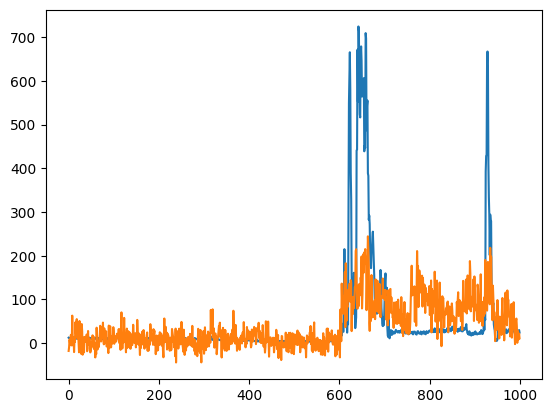

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

Thal_mat = loadmat('./neurons_Thal.mat') # Load MATLAB file

print(Thal_mat.keys()) # Print all variables stored in the .mat file

Thal_neurons_data = Thal_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

Thal = np.squeeze(Thal_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

Thal_binned = bin_spiketimes(Thal, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(Thal_binned.shape) # Print shape of binned data

T = Thal_binned.shape[0] # Get number of time bins
print(T) # Print number of time bins
lr = Ridge() # Initialize ridge regression model
x = Thal_binned # Assign spike data to variable 'x'
y = EMG_downsample # Assign EMG data to variable 'y'
print("fr=", np.mean(x)/.05) # Print average firing rate
# Part of x will be the training data and the rest will be testing
# Training data
x_train = x[:T//2,:] # First half of data for training
y_train = y[:T//2,:]
lr.fit(x_train,y_train)
x_test = x[T//2:,:] # Second half of data for testing
y_test = y[T//2:,:]
yhat = lr.predict(x_test) # Predict testing data using ridge regression model
print(lr.score(x_test,y_test)) # Print R^2 value of model

plt.figure() # Plot first 1000 data points for actual and predictive data (x vs. y)
plt.plot(y_test[:1000,0])
plt.plot(yhat[:1000,0])

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 116)
0.3267705313330915


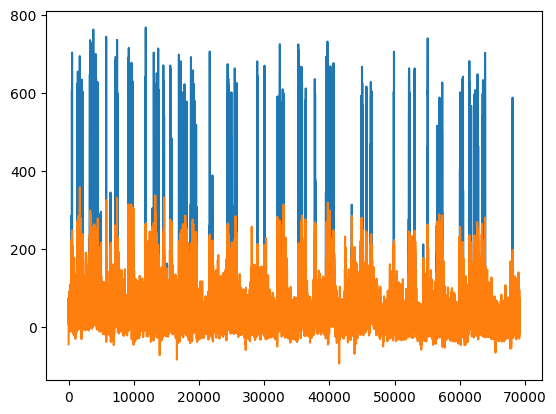

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

Thal_mat = loadmat('./neurons_Thal.mat') # Load MATLAB file

print(Thal_mat.keys()) # Print all variables stored in the .mat file

Thal_neurons_data = Thal_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

Thal = np.squeeze(Thal_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

Thal_binned = bin_spiketimes(Thal, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(Thal_binned.shape) # Print shape of binned data

lr = Ridge() # Initialize ridge regression model
x = Thal_binned # Assign spike data to variable 'x'
y = EMG_downsample # Assign EMG data to variable 'y'
lr.fit(x,y) # Fit ridge regression model on spike data to predict EMG data
yhat = lr.predict(x) # Predict EMG data using fitted ridge regression model
print(lr.score(x,y)) # Print R^2 value of model


plt.figure() # Plot entire dataset of 69179 data points for actual and predictive data (x vs. y)
plt.plot(y[:69179,0])
plt.plot(yhat[:69179,0])

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 115)
69179
fr= 3.2204344495093697
0.5805043653625606


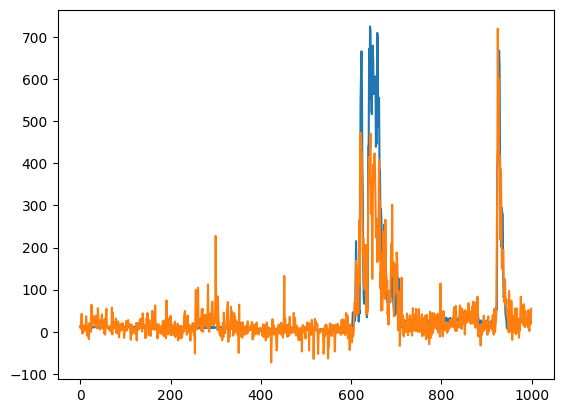

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

S1_mat = loadmat('./neurons_S1.mat') # Load MATLAB file

print(S1_mat.keys()) # Print all variables stored in the .mat file

S1_neurons_data = S1_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

S1 = np.squeeze(S1_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

S1_binned = bin_spiketimes(S1, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(S1_binned.shape) # Print shape of binned data

T = S1_binned.shape[0] # Get number of time bins
print(T) # Print number of time bins
lr = Ridge() # Initialize ridge regression model
x = S1_binned # Assign spike data to variable 'x'
y = EMG_downsample # Assign EMG data to variable 'y'
print("fr=", np.mean(x)/.05) # Print average firing rate
# Part of x will be the training data and the rest will be testing
# Training data
x_train = x[:T//2,:] # First half of data for training
y_train = y[:T//2,:]
lr.fit(x_train,y_train)
x_test = x[T//2:,:] # Second half of data for testing
y_test = y[T//2:,:]
yhat = lr.predict(x_test) # Predict testing data using ridge regression model
print(lr.score(x_test,y_test)) # Print R^2 value of model

plt.figure() # Plot first 1000 data points for actual and predictive data (x vs. y)
plt.plot(y_test[:1000,0])
plt.plot(yhat[:1000,0])

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 115)
0.6413368015284383


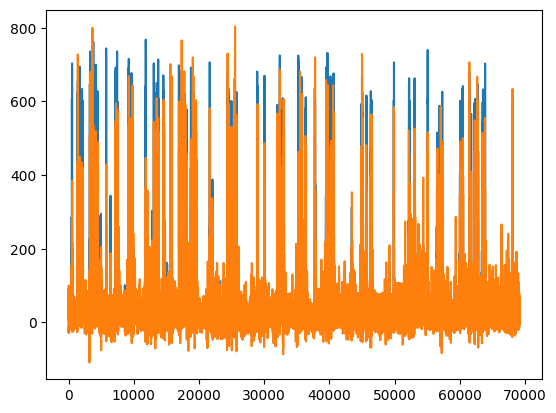

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

S1_mat = loadmat('./neurons_S1.mat') # Load MATLAB file

print(S1_mat.keys()) # Print all variables stored in the .mat file

S1_neurons_data = S1_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

S1 = np.squeeze(S1_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

S1_binned = bin_spiketimes(S1, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(S1_binned.shape) # Print shape of binned data

lr = Ridge() # Initialize ridge regression model
x = S1_binned # Assign spike data to variable 'x'
y = EMG_downsample # Assign EMG data to variable 'y'
lr.fit(x,y) # Fit ridge regression model on spike data to predict EMG data
yhat = lr.predict(x) # Predict EMG data using fitted ridge regression model
print(lr.score(x,y)) # Print R^2 value of model


plt.figure() # Plot entire dataset of 69179 data points for actual and predictive data (x vs. y)
plt.plot(y[:69179,0])
plt.plot(yhat[:69179,0])

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 124)
69179
fr= 2.796884100106829
0.36667072703120485


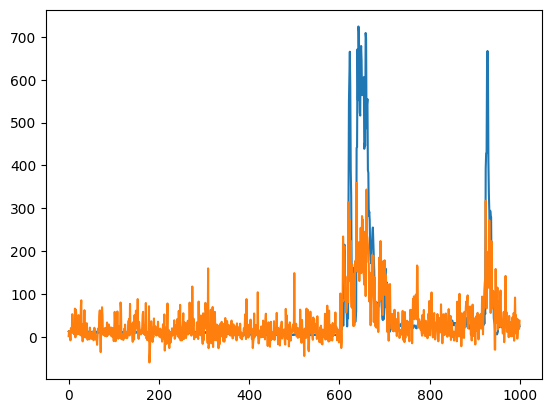

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

CFA_mat = loadmat('./neurons_CFA.mat') # Load MATLAB file

print(CFA_mat.keys()) # Print all variables stored in the .mat file

CFA_neurons_data = CFA_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

CFA = np.squeeze(CFA_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

CFA_binned = bin_spiketimes(CFA, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(CFA_binned.shape) # Print shape of binned data

T = CFA_binned.shape[0] # Get number of time bins
print(T) # Print number of time bins
lr = Ridge() # Initialize ridge regression model
x = CFA_binned # Assign spike data to variable 'x'
y = EMG_downsample # Assign EMG data to variable 'y'
print("fr=", np.mean(x)/.05) # Print average firing rate
# Part of x will be the training data and the rest will be testing
# Training data
x_train = x[:T//2,:] # First half of data for training
y_train = y[:T//2,:]
lr.fit(x_train,y_train)
x_test = x[T//2:,:] # Second half of data for testing
y_test = y[T//2:,:]
yhat = lr.predict(x_test) # Predict testing data using ridge regression model
print(lr.score(x_test,y_test)) # Print R^2 value of model

plt.figure() # Plot first 1000 data points for actual and predictive data (x vs. y)
plt.plot(y_test[:1000,0])
plt.plot(yhat[:1000,0])

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 124)
0.4767579080958145


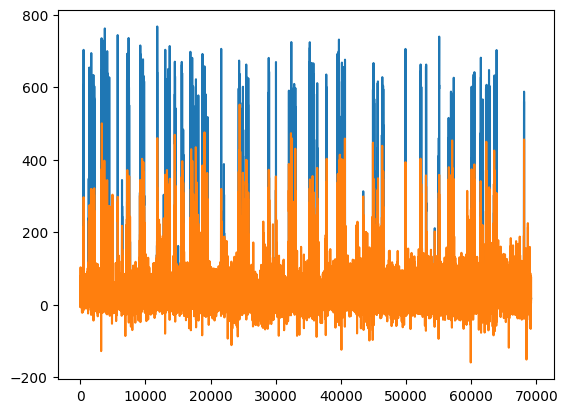

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

CFA_mat = loadmat('./neurons_CFA.mat') # Load MATLAB file

print(CFA_mat.keys()) # Print all variables stored in the .mat file

CFA_neurons_data = CFA_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

CFA = np.squeeze(CFA_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

CFA_binned = bin_spiketimes(CFA, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(CFA_binned.shape) # Print shape of binned data

lr = Ridge() # Initialize ridge regression model
x = CFA_binned # Assign spike data to variable 'x'
y = EMG_downsample # Assign EMG data to variable 'y'
lr.fit(x,y) # Fit ridge regression model on spike data to predict EMG data
yhat = lr.predict(x) # Predict EMG data using fitted ridge regression model
print(lr.score(x,y)) # Print R^2 value of model


plt.figure() # Plot entire dataset of 69179 data points for actual and predictive data (x vs. y)
plt.plot(y[:69179,0])
plt.plot(yhat[:69179,0])

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 250)
69179
fr= 1.5870087743390333
0.16150099281646102


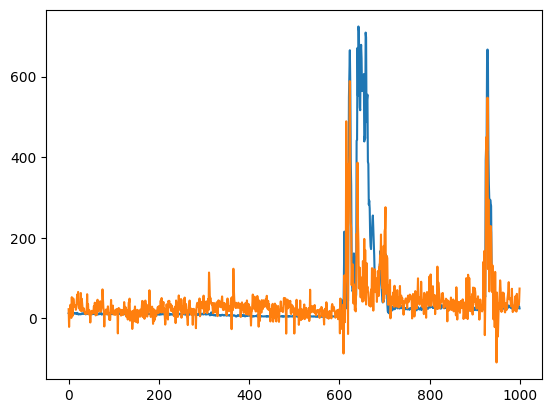

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

DLS_mat = loadmat('./neurons_DLS.mat') # Load MATLAB file

print(DLS_mat.keys()) # Print all variables stored in the .mat file

DLS_neurons_data = DLS_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

DLS = np.squeeze(DLS_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

DLS_binned = bin_spiketimes(DLS, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(DLS_binned.shape) # Print shape of binned data

T = DLS_binned.shape[0] # Get number of time bins
print(T) # Print number of time bins
lr = Ridge() # Initialize ridge regression model
x = DLS_binned # Assign spike data to variable 'x'
include_idx=np.sum(x_train,axis=0)!=0 # Find and exclude neurons with no spikes
x=x[:,include_idx] # Keep only neurons with present spiking activity
y = EMG_downsample # Assign EMG data to variable 'y'
print("fr=", np.mean(x)/.05) # Print average firing rate
# Part of x will be the training data and the rest will be testing
# Training data
x_train = x[:T//2,:] # First half of data for training
y_train = y[:T//2,:]
lr.fit(x_train,y_train)
x_test = x[T//2:,:] # Second half of data for testing
y_test = y[T//2:,:]
yhat = lr.predict(x_test) # Predict testing data using ridge regression model
print(lr.score(x_test,y_test)) # Print R^2 value of model

plt.figure() # Plot first 1000 data points for actual and predictive data (x vs. y)
plt.plot(y_test[:1000,0])
plt.plot(yhat[:1000,0])

In [ ]:
include_idx=np.sum(x_train,axis=0)!=0
print(include_idx)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  T

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 250)
0.4411810505908488


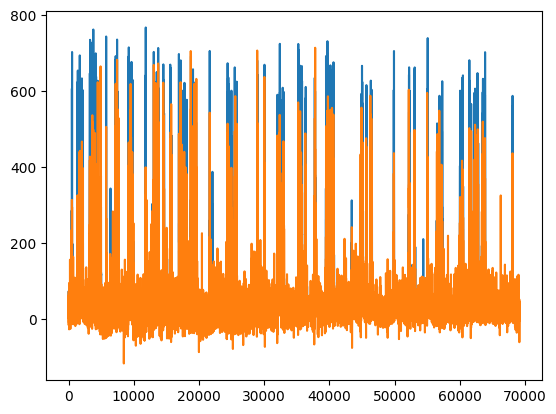

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

DLS_mat = loadmat('./neurons_DLS.mat') # Load MATLAB file

print(DLS_mat.keys()) # Print all variables stored in the .mat file

DLS_neurons_data = DLS_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

DLS = np.squeeze(DLS_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

DLS_binned = bin_spiketimes(DLS, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(DLS_binned.shape) # Print shape of binned data

lr = Ridge() # Initialize ridge regression model
x = DLS_binned # Assign spike data to variable 'x'
y = EMG_downsample # Assign EMG data to variable 'y'
lr.fit(x,y) # Fit ridge regression model on spike data to predict EMG data
yhat = lr.predict(x) # Predict EMG data using fitted ridge regression model
print(lr.score(x,y)) # Print R^2 value of model


plt.figure() # Plot entire dataset of 69179 data points for actual and predictive data (x vs. y)
plt.plot(y[:69179,0])
plt.plot(yhat[:69179,0])

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 285)
69179
fr= 1.4131303917145528
0.41460232041441525


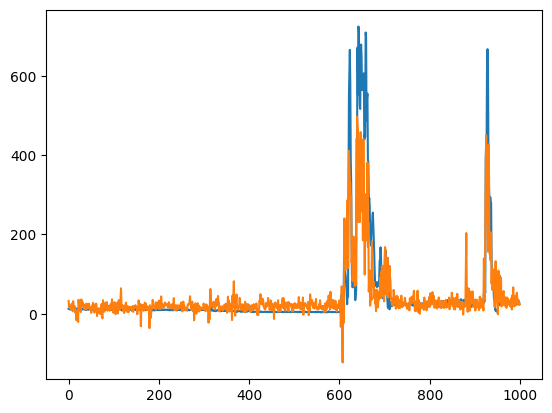

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

MS_mat = loadmat('./neurons_MS.mat') # Load MATLAB file

print(MS_mat.keys()) # Print all variables stored in the .mat file

MS_neurons_data = MS_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

MS = np.squeeze(MS_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

MS_binned = bin_spiketimes(MS, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(MS_binned.shape) # Print shape of binned data

T = MS_binned.shape[0] # Get number of time bins
print(T) # Print number of time bins
lr = Ridge() # Initialize ridge regression model
x = MS_binned # Assign spike data to variable 'x'
y = EMG_downsample # Assign EMG data to variable 'y'
print("fr=", np.mean(x)/.05) # Print average firing rate
# Part of x will be the training data and the rest will be testing
# Training data
x_train = x[:T//2,:] # First half of data for training
y_train = y[:T//2,:]
lr.fit(x_train,y_train)
x_test = x[T//2:,:] # Second half of data for testing
y_test = y[T//2:,:]
yhat = lr.predict(x_test) # Predict testing data using ridge regression model
print(lr.score(x_test,y_test)) # Print R^2 value of model

plt.figure() # Plot first 1000 data points for actual and predictive data (x vs. y)
plt.plot(y_test[:1000,0])
plt.plot(yhat[:1000,0])

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 285)
0.5249468503073107


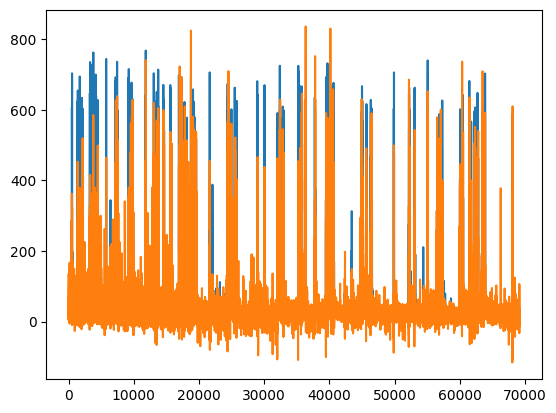

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

MS_mat = loadmat('./neurons_MS.mat') # Load MATLAB file

print(MS_mat.keys()) # Print all variables stored in the .mat file

MS_neurons_data = MS_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

MS = np.squeeze(MS_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

MS_binned = bin_spiketimes(MS, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(MS_binned.shape) # Print shape of binned data

lr = Ridge() # Initialize ridge regression model
x = MS_binned # Assign spike data to variable 'x'
y = EMG_downsample # Assign EMG data to variable 'y'
lr.fit(x,y) # Fit ridge regression model on spike data to predict EMG data
yhat = lr.predict(x) # Predict EMG data using fitted ridge regression model
print(lr.score(x,y)) # Print R^2 value of model


plt.figure() # Plot entire dataset of 69179 data points for actual and predictive data (x vs. y)
plt.plot(y[:69179,0])
plt.plot(yhat[:69179,0])

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 85)
69179
85
fr= 2.221728287145963
0.36760678017320814


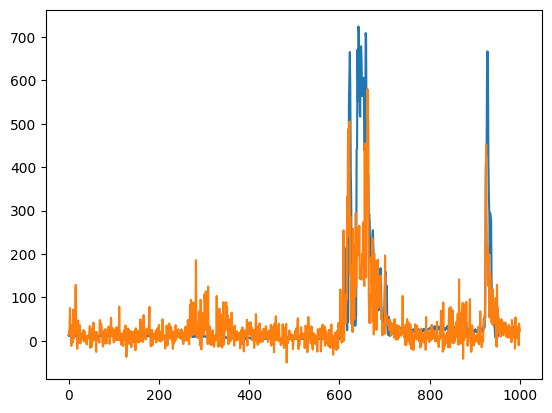

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

RFA_mat = loadmat('./neurons_RFA.mat') # Load MATLAB file

print(RFA_mat.keys()) # Print all variables stored in the .mat file

RFA_neurons_data = RFA_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

RFA = np.squeeze(RFA_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

RFA_binned = bin_spiketimes(RFA, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(RFA_binned.shape) # Print shape of binned data

T = RFA_binned.shape[0] # Get number of time bins
print(T) # Print number of time bins
lr = Ridge() # Initialize ridge regression model
x = RFA_binned # Assign spike data to variable 'x'
y = EMG_downsample # Assign EMG data to variable 'y'
print("fr=", np.mean(x)/.05) # Print average firing rate
# Part of x will be the training data and the rest will be testing
# Training data
x_train = x[:T//2,:] # First half of data for training
y_train = y[:T//2,:]
lr.fit(x_train,y_train)
x_test = x[T//2:,:] # Second half of data for testing
y_test = y[T//2:,:]
yhat = lr.predict(x_test) # Predict testing data using ridge regression model
print(lr.score(x_test,y_test)) # Print R^2 value of model

plt.figure() # Plot first 1000 data points for actual and predictive data (x vs. y)
plt.plot(y_test[:1000,0])
plt.plot(yhat[:1000,0])

(69179, 4)
dict_keys(['__header__', '__version__', '__globals__', 'regiondata'])
(69179, 85)
0.4350693998099656


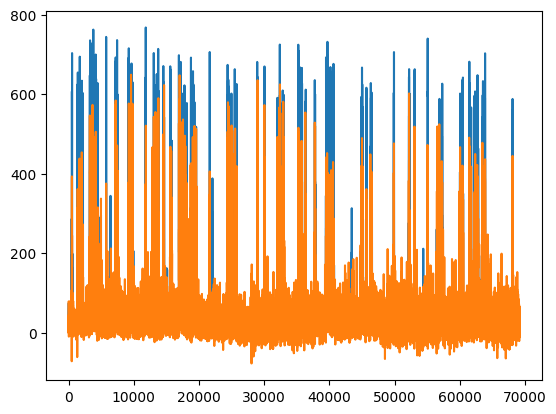

In [ ]:
!pip install mat73 # Install the mat73 module
import numpy as np # Import required libraries
from scipy.io import loadmat
import mat73
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

EMG = mat73.loadmat('EMG.mat') # Load EMG data from original .mat file using mat73 module
EMG = EMG['EMG'] # Target 'EMG' variable from EMG data
EMG_downsample = EMG[:,0::50] # Downsample EMG data using 50 ms time bins
EMG_downsample = EMG_downsample[:,:-1].T # Transpose resulting samples
print(EMG_downsample.shape) # Print shape of downsampled EMG data
def bin_spiketimes(spike_times,dt,wdw_start,wdw_end):
  """
  Function that puts spikes into bins
Stolen from Josh's Neural_Decoding.preprocessing_funcs, modified to work on list of arrays

  Parameters
  ----------
  spike_times: an array of arrays
      an array of neurons. within each neuron's array is an array containing all the spike times of that neuron
  dt: number (any format)
      size of time bins
  wdw_start: number (any format)
      the start time for putting spikes in bins
  wdw_end: number (any format)
      the end time for putting spikes in bins

  Returns
  -------
  neural_data: a matrix of size "number of time bins" x "number of neurons"
      the number of spikes in each time bin for each neuron
  """
  edges=np.arange(wdw_start,wdw_end,dt) # Get edges of time bins
  num_bins=edges.shape[0]-1 # Number of bins
  num_neurons=len(spike_times) # Number of neurons
  neural_data=np.empty([num_bins,num_neurons]) # Initialize array for binned neural data
  # Count number of spikes in each bin for each neuron, and put in array
  for i in range(num_neurons):
      neural_data[:,i]=np.histogram(spike_times[i],edges)[0]
  return neural_data

RFA_mat = loadmat('./neurons_RFA.mat') # Load MATLAB file

print(RFA_mat.keys()) # Print all variables stored in the .mat file

RFA_neurons_data = RFA_mat['regiondata'] # Access a specific variable (assuming it's named 'neurons')

# # Now you can work with neurons_data, which will be a NumPy array or matrix
# # Example: Print dimensions of neurons_data
# print(neurons_data.shape)

RFA = np.squeeze(RFA_neurons_data['train']).tolist() # Extract and squeeze 'train' variable from regiondata

RFA_binned = bin_spiketimes(RFA, 50, 0, 3459000) # Bin spike times during 34590000 ms duration in 50 ms time bins
print(RFA_binned.shape) # Print shape of binned data

lr = Ridge() # Initialize ridge regression model
x = RFA_binned # Assign spike data to variable 'x'
y = EMG_downsample # Assign EMG data to variable 'y'
lr.fit(x,y) # Fit ridge regression model on spike data to predict EMG data
yhat = lr.predict(x) # Predict EMG data using fitted ridge regression model
print(lr.score(x,y)) # Print R^2 value of model


plt.figure() # Plot entire dataset of 69179 data points for actual and predictive data (x vs. y)
plt.plot(y[:69179,0])
plt.plot(yhat[:69179,0])